## Animal Weight gain using Regression

In [1]:
import numpy as np
import pandas as pd
import random

# Create a synthetic dataset for regression analysis with correlations
np.random.seed(0)

# Generate 100 samples
n_samples = 100

# Generate random values for the features: food intake, temperature
food_intake =np.abs(50 * np.random.randn(n_samples, 1))
temperature = np.abs(20 + 10 * np.random.randn(n_samples, 1))  # simulating temperature values

# Generate the target variable: weight gain
# Weight gain now depends on food intake and temperature with correlations
weight_gain = np.abs(50 + 0.5 * food_intake + 0.1 * temperature + np.random.randn(n_samples, 1))

# Create a DataFrame
data = pd.DataFrame({
    'Food_Intake': food_intake.flatten(),  # Flatten to convert from 2D to 1D array
    'Temperature': temperature.flatten(),  # Flatten to convert from 2D to 1D array
    'Weight_Gain': weight_gain.flatten()
})


In [2]:
data.head()

,Food_Intake,Temperature,Weight_Gain
0,88.202617,38.831507,97.615278
1,20.007860,6.522409,60.416792
2,48.936899,7.295150,76.297624
3,112.044660,29.693967,109.646990
4,93.377900,8.268766,98.155958


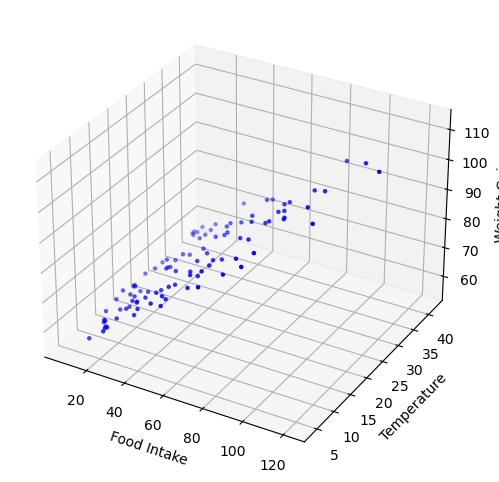

In [3]:
# Visualising the Features against the target variable using Axes3D

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X1 = data['Food_Intake']  # Feature 1: Food Intake
X2 = data['Temperature']  # Feature 2: Temperature
y = data['Weight_Gain']   # Target variable: Weight Gain

# Creating a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(X1, X2, y, c='b', marker='.')

# Setting labels
ax.set_xlabel('Food Intake')
ax.set_ylabel('Temperature')
ax.set_zlabel('Weight Gain')

# Adjust the axis limits and add grid
ax.set_xlim([min(X1), max(X1)])
ax.set_ylim([min(X2), max(X2)])
ax.set_zlim([min(y), max(y)])
ax.grid()

# Show plot
plt.show()


In [4]:
# Normal Equation
from sklearn.preprocessing import add_dummy_feature

# Adding an intercept term to the food intake feature
X_intercept = add_dummy_feature(food_intake)  # Append a column of 1s for the intercept

# Calculating the optimal model parameters using the Normal Equation
optimal_params = np.linalg.inv(X_intercept.T.dot(X_intercept)).dot(X_intercept.T).dot(weight_gain)
optimal_params


array([[52.12061003],
       [ 0.49769395]])

Intercept: 52.120610025626576
Coefficient for Food Intake: 0.4976939463543877


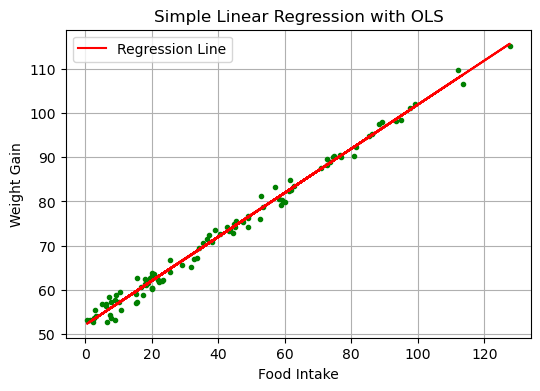

In [5]:
# Linear regression using LinearRegression()

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame containing the synthetic dataset
X = data[['Food_Intake']]  # Independent variable
y = data['Weight_Gain']    # Dependent variable

# Create and fit the OLS model
model = LinearRegression()
model.fit(X, y)

# Display model parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient for Food Intake: {model.coef_[0]}")

# Visualizing the Regression Line
plt.figure(figsize=(6, 4))
plt.plot(X, y, 'g.')  # Actual data points
plt.plot(X, model.predict(X), 'r-', label='Regression Line')  # Regression line
plt.xlabel('Food Intake')
plt.ylabel('Weight Gain')
plt.grid()
plt.legend()
plt.title('Simple Linear Regression with OLS')
plt.savefig('SimpleLinearRegression.png', dpi=300)
plt.show()


Intercept: 49.72927664354033
Coefficients: [0.50184912 0.10654829]


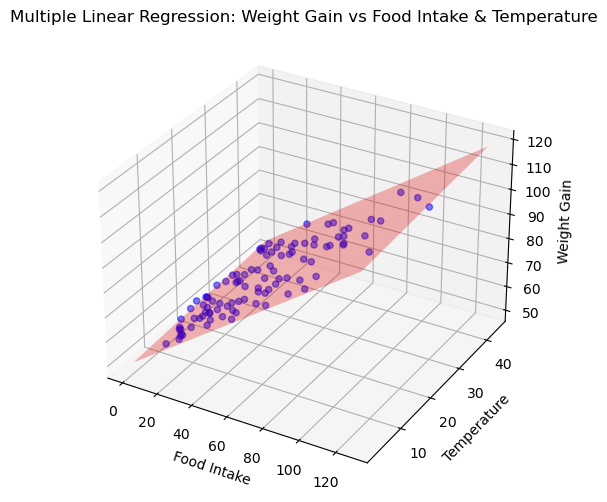

In [6]:
# Multiple Linear regression
from mpl_toolkits.mplot3d import Axes3D

#'data' is the DataFrame containing the synthetic dataset
X = data[['Food_Intake', 'Temperature']]  # Independent variables
y = data['Weight_Gain']  # Dependent variable

# Create and fit the multiple linear regression model
multi_model = LinearRegression()
multi_model.fit(X, y)

# Display the model parameters
print(f"Intercept: {multi_model.intercept_}")
print(f"Coefficients: {multi_model.coef_}")

# Creating a meshgrid for the values of Food_Intake and Temperature
x_surf, y_surf = np.meshgrid(np.linspace(data['Food_Intake'].min(), data['Food_Intake'].max(), 100), np.linspace(data['Temperature'].min(), data['Temperature'].max(), 100))
onlyX = pd.DataFrame({'Food_Intake': x_surf.ravel(), 'Temperature': y_surf.ravel()})
fittedY = multi_model.predict(onlyX)

# Reshape the predicted values to match x_surf and y_surf
fittedY = fittedY.reshape(x_surf.shape)

# Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with the actual data
ax.scatter(data['Food_Intake'], data['Temperature'], data['Weight_Gain'], c='blue', marker='o', alpha=0.5)

# Plotting the surface (plane of best fit)
ax.plot_surface(x_surf, y_surf, fittedY, color='r', alpha=0.3)

# Labels and titles
ax.set_xlabel('Food Intake')
ax.set_ylabel('Temperature')
ax.set_zlabel('Weight Gain')
plt.savefig('Multiple Linear Regression.png', dpi=300)
plt.title('Multiple Linear Regression: Weight Gain vs Food Intake & Temperature')

# Show the plot
plt.show()


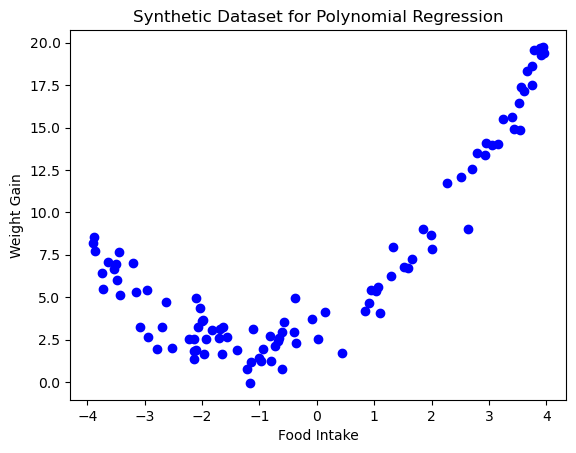

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the number of samples
m = 100

# Generate Food_Intake values within a different range
Food_Intake = 8 * np.random.rand(m, 1) - 4  # Range from -4 to 4

# Generate Weight_Gain values with a different quadratic relationship and noise
Weight_Gain = 0.7 * Food_Intake ** 2 + 1.5 * Food_Intake + 3 + np.random.randn(m, 1)  # Quadratic relationship with noise

# Create a DataFrame
data = pd.DataFrame({'Food_Intake': Food_Intake.flatten(), 'Weight_Gain': Weight_Gain.flatten()})

# Visualization for inspection
plt.scatter(data['Food_Intake'], data['Weight_Gain'], color='blue')
plt.xlabel('Food Intake')
plt.ylabel('Weight Gain')
plt.title('Synthetic Dataset for Polynomial Regression')
plt.show()



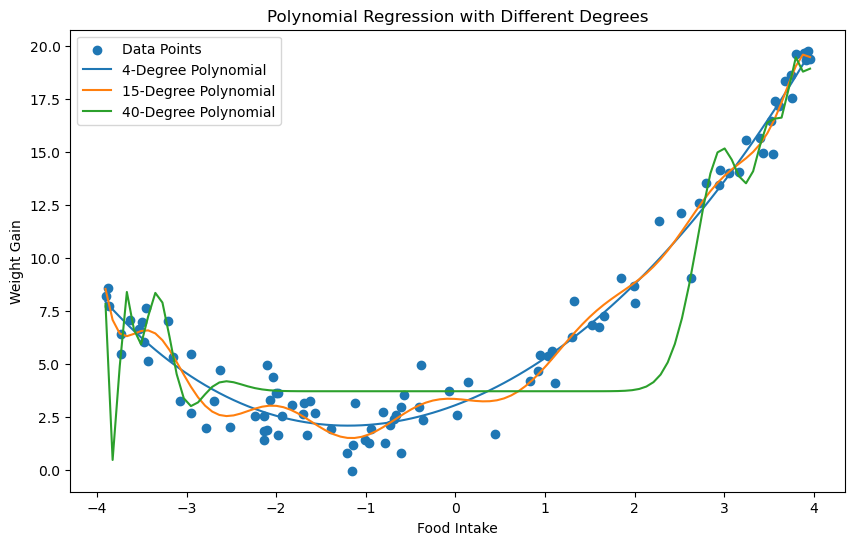

In [8]:
# Polynomial Regression

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Assuming 'data' is the DataFrame with 'Food_Intake' and 'Weight_Gain'
X = data['Food_Intake'].values.reshape(-1, 1)  # Independent variable
y = data['Weight_Gain']  # Dependent variable

# Degrees of the polynomial to be evaluated
degrees = [4, 15, 40]

# Setting up the plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data Points')

# Iterate through various degrees and fit the polynomial regression model
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)

    poly_reg_model = LinearRegression()
    poly_reg_model.fit(X_poly, y)

    # Predictions for visualization
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = poly_reg_model.predict(poly_features.transform(X_range))

    # Visualizing the Polynomial Regression results
    plt.plot(X_range, y_pred, label=f'{degree}-Degree Polynomial')

# Plot formatting
plt.xlabel('Food Intake')
plt.ylabel('Weight Gain')
plt.legend()
plt.title('Polynomial Regression with Different Degrees')
plt.savefig('Polynomial Regression.png', dpi=300)
plt.show()


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

X = data.drop('Weight_Gain', axis=1)  
y = data['Weight_Gain']  

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Fit the model
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Evaluation
y_pred = ridge_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")


Mean Squared Error (MSE): 15.48
R-squared (R2) Score: 0.4744


In [11]:
# Lasso regression

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

# Evaluation
y_pred = lasso_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Squared Error (MSE): 15.41
R-squared (R2) Score: 0.4765


In [12]:
# Elastic net 

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

# Evaluation
y_pred = elastic_net.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")


Mean Squared Error (MSE): 14.74
R-squared (R2) Score: 0.4992


In [13]:
# Support Vector Regression 
from sklearn.svm import SVR

svr_reg = SVR(C=1.0, epsilon=0.2)
svr_reg.fit(X_train, y_train)

# Evaluation
y_pred = svr_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")


Mean Squared Error (MSE): 2.45
R-squared (R2) Score: 0.9166


In [14]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)

# Evaluation
y_pred = tree_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")


Mean Squared Error (MSE): 2.63
R-squared (R2) Score: 0.9107


In [15]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100)
forest_reg.fit(X_train, y_train)

# Evaluation
y_pred = forest_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")


Mean Squared Error (MSE): 1.95
R-squared (R2) Score: 0.9339


In [16]:
# Gradient Boosting regression
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
gbrt.fit(X_train, y_train)

# Evaluation
y_pred = gbrt.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")


Mean Squared Error (MSE): 1.75
R-squared (R2) Score: 0.9404
